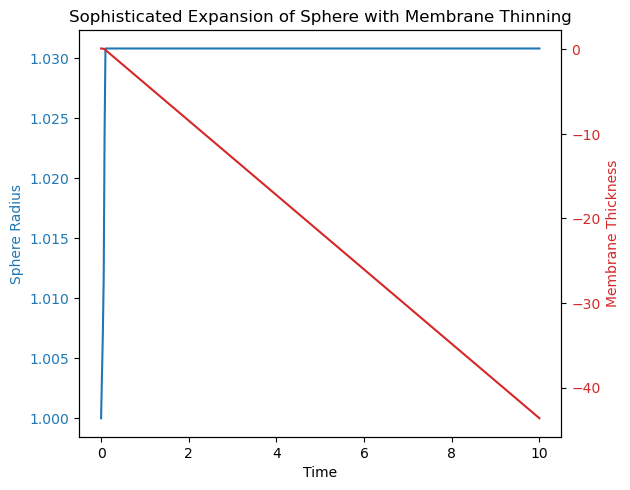

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
initial_radius = 1.0
initial_thickness = 0.1
youngs_modulus = 1e5  # Elastic modulus of the membrane material
poissons_ratio = 0.3  # Poisson's ratio of the membrane material
pressure_coefficient = 0.01  # Arbitrary coefficient to relate pressure to expansion rate
thinning_rate_constant = 1e-3  # Rate at which the membrane thins, dependent on stress
time_span = (0, 10)  # Time span for the simulation
time_eval = np.linspace(time_span[0], time_span[1], 500)  # Evaluation points


def pressure(radius):
    volume = (4 / 3) * np.pi * radius**3
    return volume**(1 / 3)  # Simplified nonlinear pressure model


def membrane_stress(radius, thickness):
    strain = (radius - initial_radius) / initial_radius
    stress = youngs_modulus * strain / (1 - poissons_ratio)
    return stress


def membrane_thickness_derivative(radius, thickness):
    stress = membrane_stress(radius, thickness)
    thinning_rate = thinning_rate_constant * stress
    return -thinning_rate


def system(t, y):
    radius, thickness = y
    if thickness <= 0:
        thickness = 0
    pres = pressure(radius)
    stress = membrane_stress(radius, thickness)
    expansion_rate = pressure_coefficient * pres / thickness if thickness > 0 else 0
    thickness_rate = membrane_thickness_derivative(radius, thickness)
    return [expansion_rate, thickness_rate]


# Initial conditions
initial_conditions = [initial_radius, initial_thickness]

# Solve the system of ODEs
solution = solve_ivp(system, time_span, initial_conditions, t_eval=time_eval)

radii = solution.y[0]
thicknesses = solution.y[1]

# Visualization
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Sphere Radius', color=color)
ax1.plot(time_eval, radii, color=color, label='Sphere Radius')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Membrane Thickness', color=color)
ax2.plot(time_eval, thicknesses, color=color, label='Membrane Thickness')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.title('Sophisticated Expansion of Sphere with Membrane Thinning')
plt.show()
